In [ ]:
#출처 : https://lhh3520.tistory.com/376

import tensorflow as tf
from tensorflow import keras
from tensorflow.python.keras import utils
from tensorflow.python.keras import layers
from tensorflow.python.keras import datasets
from tensorflow.python.keras.callbacks import EarlyStopping
from tensorflow.python.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# 데이터셋 불러오기
cifar_mnist = datasets.cifar10
(train_images, train_labels),(test_images, test_labels) = cifar_mnist.load_data()

170500096/170498071 [==============================] - 2s 0us/step


In [ ]:
import warnings
warnings.filterwarnings(action='ignore') 

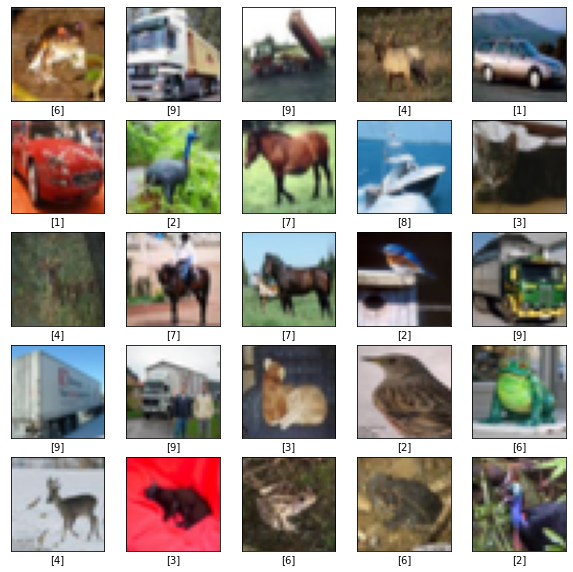

In [ ]:
# 데이터 확인하기
class_name = ['Airplane','Car','Bird','Cat','Deer','Dog','Frog','Horse','Ship','Truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i],cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])
plt.show()

In [ ]:
batch_size = 64
num_classes = 10
epochs = 35

train_images = train_images.astype('float32')
train_images = train_images / 255

test_images = test_images.astype('float32')
test_images = test_images / 255

train_labels = keras.utils.to_categorical(train_labels, num_classes)
test_labels = keras.utils.to_categorical(test_labels, num_classes)

In [ ]:
model = keras.Sequential([
    Conv2D(32, kernel_size=(3,3), padding='same', input_shape=train_images.shape[1:], activation=tf.nn.relu),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.25),
    
    Conv2D(64, kernel_size=(3,3), padding='same', activation=tf.nn.relu),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.25),
    
    Flatten(),
    Dense(64, activation=tf.nn.relu),
    Dropout(0.25),
    Dense(num_classes, activation=tf.nn.softmax)
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 8, 8, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 4096)              0

In [ ]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(
    train_images, train_labels, epochs=epochs,
    validation_data=(test_images, test_labels),
    shuffle=True, callbacks=[early_stopping]
)

Epoch 1/35
1563/1563 [==============================] - 38s 4ms/step - loss: 1.6273 - accuracy: 0.4045 - val_loss: 1.2815 - val_accuracy: 0.5450
Epoch 2/35
1563/1563 [==============================] - 6s 4ms/step - loss: 1.3298 - accuracy: 0.5193 - val_loss: 1.1430 - val_accuracy: 0.6005
Epoch 3/35
1563/1563 [==============================] - 6s 4ms/step - loss: 1.2320 - accuracy: 0.5576 - val_loss: 1.0780 - val_accuracy: 0.6187
Epoch 4/35
1563/1563 [==============================] - 6s 4ms/step - loss: 1.1614 - accuracy: 0.5831 - val_loss: 1.0056 - val_accuracy: 0.6503
Epoch 5/35
1563/1563 [==============================] - 6s 4ms/step - loss: 1.1162 - accuracy: 0.5982 - val_loss: 0.9976 - val_accuracy: 0.6520
Epoch 6/35
1563/1563 [==============================] - 7s 4ms/step - loss: 1.0721 - accuracy: 0.6142 - val_loss: 0.9473 - val_accuracy: 0.6736
Epoch 7/35
1563/1563 [==============================] - 7s 4ms/step - loss: 1.0332 - accuracy: 0.6325 - val_loss: 0.9427 - val_accuracy

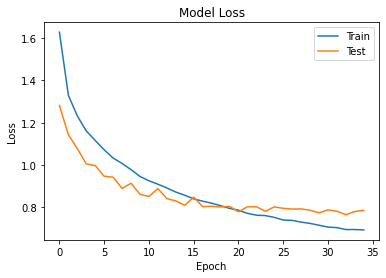

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train','Test'], loc=0)
plt.show()

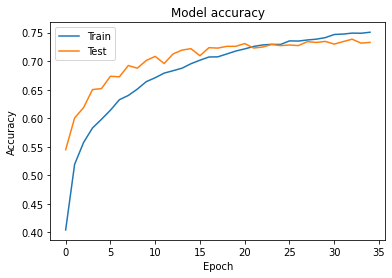

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train','Test'], loc=0)
plt.show()

In [ ]:
predictions = model.predict(test_images)

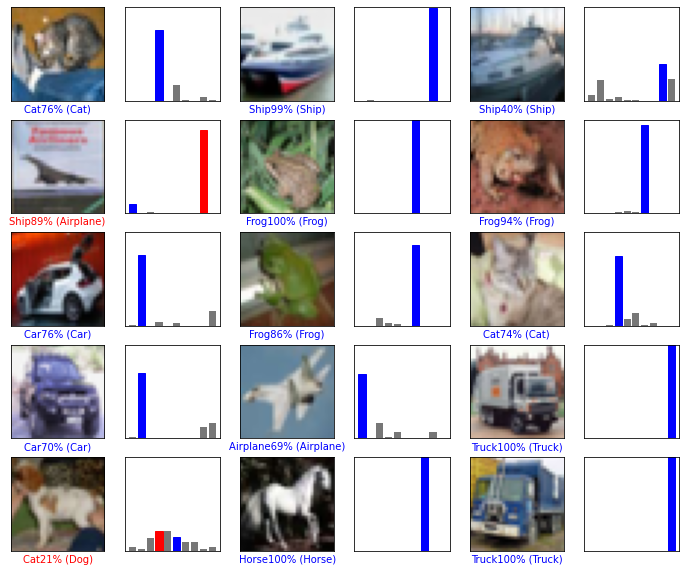

In [ ]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i],img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img, cmap=plt.cm.binary)
    
    predicted_label = np.argmax(predictions_array)
    if predicted_label == np.argmax(true_label):
        color='blue'
    else:
        color='red'
    plt.xlabel("{}{:2.0f}% ({})".format(class_name[predicted_label],
                                       100*np.max(predictions_array),
                                       class_name[np.argmax(true_label)]), color=color)
    
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0,1])
    predicted_label = np.argmax(predictions_array)
    
    thisplot[predicted_label].set_color('red')
    thisplot[np.argmax(true_label)].set_color('blue')
    
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions, test_labels)
plt.show()